# EXPLORATORY DATA ANALYSIS 
## Problem understanding
## Data Description
## Methodology
> ### Data Per_processing
>> ### [Libraries](#Libraries)
>> ### [Data Cleaning](#DataCleaning)
- Duplicate or unnecessary data:
- Inconsistent text and typos:
- Missing values:
- Outliers:
- Managing Columns of Data
> ### [Exploratory Data Analysis (EDA)](#ExploratoryDataAnalysis(EDA))
- Correlation Between Features:
> ### [Questions](#Questions)

<br>
<img src="images.jpg" alt="Web Scraping Pipeline" style="width: 650px;"/>

## Problem understanding
Through a fake scenario. One of the companies seeks to open an exhibition of used cars with strong income and wants to know several things, including: the most popular brands, knowledge of prices, and several other things, for example: the number of miles the car has traveled. Therefore, we will ask a number of questions:
1- What is the brand with the highest price and in which cities it is?
2- Does the model year affect the price of the car?
3- What states have clean cars, and what are the most popular brands in each state?
4- What are the most common car colors in each state?

## Data Description: 
#### With 13 columns, 12 features for each car, and 2500 rows, a dataset has three types of data, as shown in Table 1, which includes lists the features, data type, and description for each column.
#### The dataset has a size of 284 KB that called US Cars' data. [DataSet](https://www.kaggle.com/doaaalsenani/usa-cers-dataset "optional title")


######        Table 1: Describe columns by clarifying features and data type.

|Features    |Data Type     |Description                    |
|:-----------|:-------------|:------------------------------|
|Price       |Integer  |The sale price of the vehicle in the ad.|
|Years       |Integer  |The vehicle registration year.|
|Brand       |String   |The brand of car.|
|Model       |String   |model of the vehicle.|
|Color       |String   |Color of the vehicle.|
|State/City  |String   |The location in which the car is being available for purchase.|
|Mileage     |Float    |miles traveled by vehicle.|
|Vin         |String   |The vehicle identification number is a collection of 17 characters (digits and capital letters).|
|Title Status|String   |This feature included binary classification, which are clean title vehicles and salvage insurance.|
|Lot         |Integer  |A lot of numbers are identification the number assigned for a particular quantity or a lot of materials from a single manufacturer. For cars, a lot numbers are combined with a serial number to form the Vehicle Identification Number.|
|Condition   |String   |Time|

In [1]:
#from IPython.display import Image
#Image(filename='Corolla.jpg')

# Libraries 

In [5]:
#! pip install -U pandas-profiling 
#ProfileReport(df)

In [2]:
# Importing the libraries
#from palettable.colorbrewer.qualitative import Pastel1_7
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import math 
import random
import plotly.express as px
%pylab inline
 #see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%config InlineBackend.figure_format = 'svg'
# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

from mpl_toolkits.mplot3d import Axes3D
import os
import warnings


Bad key text.latex.preview in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\hp\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need 

Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# Importing the dataset
df = pd.read_csv('USA_cars_datasets.csv', na_values='?')

In [4]:
df.head()

Unnamed: 0  price      brand    model  year   title_status  mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle   274117   
1           1   2899       ford       se  2011  clean vehicle   190552   
2           2   5350      dodge      mpv  2018  clean vehicle    39590   
3           3  25000       ford     door  2014  clean vehicle    64146   
4           4  27700  chevrolet     1500  2018  clean vehicle     6654   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left

In [5]:
# Show the last rows of the dataset
df.tail()

Unnamed: 0  price   brand  model  year   title_status  mileage   color  \
2494        2494   7800  nissan  versa  2019  clean vehicle    23609     red   
2495        2495   9200  nissan  versa  2018  clean vehicle    34553  silver   
2496        2496   9200  nissan  versa  2018  clean vehicle    31594  silver   
2497        2497   9200  nissan  versa  2018  clean vehicle    32557   black   
2498        2498   9200  nissan  versa  2018  clean vehicle    31371  silver   

                      vin        lot       state country      condition  
2494    3n1cn7ap9kl880319  167722715  california     usa    1 days left  
2495    3n1cn7ap5jl884088  167762225     florida     usa  21 hours left  
2496    3n1cn7ap9jl884191  167762226     florida     usa  21 hours left  
2497    3n1cn7ap3jl883263  167762227     florida     usa    2 days left  
2498    3n1cn7ap4jl884311  167762228     florida     usa  21 hours left

In [6]:
# how many instances (rows) and how many attributes (columns) the data contains with the shape property.
df.shape

(2499, 13)

In [7]:
# Summary the Columns, Types, Rows and the memory used by the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   brand         2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   object
 6   mileage       2499 non-null   int64 
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


### Unique Values in each Column

In [8]:
#intilize Create user input list
#Variable declaration uniqueValues and calling two libraries import numpy as np, import pandas as pd
uniqueValues = df.nunique()
uniqueValues

Unnamed: 0      2499
price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
vin             2495
lot             2495
state             44
country            2
condition         47
dtype: int64

In [9]:
# Summary statistic for each numerical column
df.describe()

Unnamed: 0         price         year       mileage           lot
count  2499.000000   2499.000000  2499.000000  2.499000e+03  2.499000e+03
mean   1249.000000  18767.671469  2016.714286  5.229869e+04  1.676914e+08
std     721.543484  12116.094936     3.442656  5.970552e+04  2.038772e+05
min       0.000000      0.000000  1973.000000  0.000000e+00  1.593488e+08
25%     624.500000  10200.000000  2016.000000  2.146650e+04  1.676253e+08
50%    1249.000000  16900.000000  2018.000000  3.536500e+04  1.677451e+08
75%    1873.500000  25555.500000  2019.000000  6.347250e+04  1.677798e+08
max    2498.000000  84900.000000  2020.000000  1.017936e+06  1.678055e+08

# Data Cleaning

### Check for Duplicates or unnecessary data

In [10]:
data_duplicated=df[df.duplicated()]
data_duplicated

Empty DataFrame
Columns: [Unnamed: 0, price, brand, model, year, title_status, mileage, color, vin, lot, state, country, condition]
Index: []


###  Missing values: Check for missing data (NAN Value)

In [11]:
#df.info()

In [12]:
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False) 
#this to check how many missing values in the features of type object only

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

## Managing Columns of Data
### 1- Combine  columns (state & country) 

In [13]:
df['state'] = df['state'] + df['country']
df.head(3)

Unnamed: 0  price   brand    model  year   title_status  mileage   color  \
0           0   6300  toyota  cruiser  2008  clean vehicle   274117   black   
1           1   2899    ford       se  2011  clean vehicle   190552  silver   
2           2   5350   dodge      mpv  2018  clean vehicle    39590  silver   

                   vin        lot           state country     condition  
0    jtezu11f88k007763  159348797  new jersey usa     usa  10 days left  
1    2fmdk3gc4bbb02217  166951262   tennessee usa     usa   6 days left  
2    3c4pdcgg5jt346413  167655728     georgia usa     usa   2 days left

### brand & model columns

In [14]:
df['brand'] = df['brand']+['-'] + df['model']
df.head(3)

Unnamed: 0  price           brand    model  year   title_status  mileage  \
0           0   6300  toyota-cruiser  cruiser  2008  clean vehicle   274117   
1           1   2899         ford-se       se  2011  clean vehicle   190552   
2           2   5350       dodge-mpv      mpv  2018  clean vehicle    39590   

    color                  vin        lot           state country  \
0   black    jtezu11f88k007763  159348797  new jersey usa     usa   
1  silver    2fmdk3gc4bbb02217  166951262   tennessee usa     usa   
2  silver    3c4pdcgg5jt346413  167655728     georgia usa     usa   

      condition  
0  10 days left  
1   6 days left  
2   2 days left

### 2- Drop Usuful columns 
### Unnamed: 0, vin,  model, lot, and country

In [15]:
df.drop(labels= ['Unnamed: 0', 'vin', 'country', 'model','lot'], axis=1 , inplace=True)

In [16]:
df.head(3)

price           brand  year   title_status  mileage   color  \
0   6300  toyota-cruiser  2008  clean vehicle   274117   black   
1   2899         ford-se  2011  clean vehicle   190552  silver   
2   5350       dodge-mpv  2018  clean vehicle    39590  silver   

            state     condition  
0  new jersey usa  10 days left  
1   tennessee usa   6 days left  
2     georgia usa   2 days left

In [17]:
# how many instances (rows) and how many attributes (columns) after deleting columns from the dataset 
df.shape

(2499, 8)

In [18]:
# Summary statistic for each numerical column
df.describe()

price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06

In [19]:
sns.pairplot(df);

### Outliers

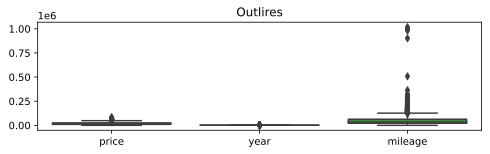

In [20]:
# Using Boxplots to visualize numeric data for check from Outlires value. 
plt.figure(figsize=(8,2))
sns.boxplot(data=df[['price', 'year', 'mileage']])
plt.title('Outlires')
plt.show()

### Inconsistent text and typos 

# Exploratory Data Analysis (EDA) 

###  Analyze each column in the dataset, Price Column

In [21]:
vcs= df.price.value_counts()
vcs

0        43
16500    26
13900    21
15500    19
15000    19
         ..
12560     1
11760     1
7340      1
6530      1
30100     1
Name: price, Length: 790, dtype: int64

## Missing values in price column 

In [22]:
# Check for missing values
df.price.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2494    False
2495    False
2496    False
2497    False
2498    False
Name: price, Length: 2499, dtype: bool

## Replace missing values 

In [23]:
# Replace missing values with actual values (mean).
# Imputing Missings with mean
mean = df.price.mean()
print('The mean price column = ', mean, '\n')

The mean price column =  18767.671468587436 



In [24]:
# 1- The missing value in price column appears as “0”. 
# 2- Replace the values "0" with mean. 
df = df.replace('0', np.nan)

In [25]:
sum(df.price.isna())

0

In [26]:
df[['price']]=df[['price']].replace(0,mean)  # or df[['price']].replace(0,mean)
df

price           brand  year   title_status  mileage   color  \
0      6300.0  toyota-cruiser  2008  clean vehicle   274117   black   
1      2899.0         ford-se  2011  clean vehicle   190552  silver   
2      5350.0       dodge-mpv  2018  clean vehicle    39590  silver   
3     25000.0       ford-door  2014  clean vehicle    64146    blue   
4     27700.0  chevrolet-1500  2018  clean vehicle     6654     red   
...       ...             ...   ...            ...      ...     ...   
2494   7800.0    nissan-versa  2019  clean vehicle    23609     red   
2495   9200.0    nissan-versa  2018  clean vehicle    34553  silver   
2496   9200.0    nissan-versa  2018  clean vehicle    31594  silver   
2497   9200.0    nissan-versa  2018  clean vehicle    32557   black   
2498   9200.0    nissan-versa  2018  clean vehicle    31371  silver   

               state      condition  
0     new jersey usa   10 days left  
1      tennessee usa    6 days left  
2        georgia usa    2 days left  
3       virginia usa  22 hours left  
4        florida usa  22 hours left  
...              ...            ...  
2494  california usa    1 days left  
2495     florida usa  21 hours left  
2496     florida usa  21 hours left  
2497     florida usa    2 days left  
2498     florida usa  21 hours left  

[2499 rows x 8 columns]

In [27]:
vcs= df.price.value_counts()
vcs

18767.671469    43
16500.000000    26
13900.000000    21
15500.000000    19
15000.000000    19
                ..
12560.000000     1
11760.000000     1
7340.000000      1
6530.000000      1
30100.000000     1
Name: price, Length: 790, dtype: int64

## Binning 

In [28]:
pre_con = df.price.agg(['max', 'mean', 'min'])
pre_con

max     84900.000000
mean    19090.604591
min        25.000000
Name: price, dtype: float64

In [29]:
# categorize prices to 3 bins: low, medium, and high-priced cars

binwidth =int((max(df['price'])-min(df['price']))/3)

In [30]:
bins= range(int(min(df['price'])),int(max(df['price'])), binwidth)

In [31]:
df['price_binncd']= pd.cut(df['price'], 3, labels=['Low','Medium','High'])

In [32]:
df.price_binncd.dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

In [33]:
type(df.price)

pandas.core.series.Series

In [34]:
df.price.dtypes

dtype('float64')

In [35]:
df.head()

price           brand  year   title_status  mileage   color  \
0   6300.0  toyota-cruiser  2008  clean vehicle   274117   black   
1   2899.0         ford-se  2011  clean vehicle   190552  silver   
2   5350.0       dodge-mpv  2018  clean vehicle    39590  silver   
3  25000.0       ford-door  2014  clean vehicle    64146    blue   
4  27700.0  chevrolet-1500  2018  clean vehicle     6654     red   

            state      condition price_binncd  
0  new jersey usa   10 days left          Low  
1   tennessee usa    6 days left          Low  
2     georgia usa    2 days left          Low  
3    virginia usa  22 hours left          Low  
4     florida usa  22 hours left          Low

In [36]:
def price_cat(p):
    if p <= df.price.min():
        return "LOW(0-25)"
    elif p <= df.price.mean():
        return"Medium(26-19090)"
    elif p <= df.price.max():
        return"High(19091-84900)"
    else:
        return"84900+"

In [37]:
df["price_cat"] = df.price.apply(price_cat)

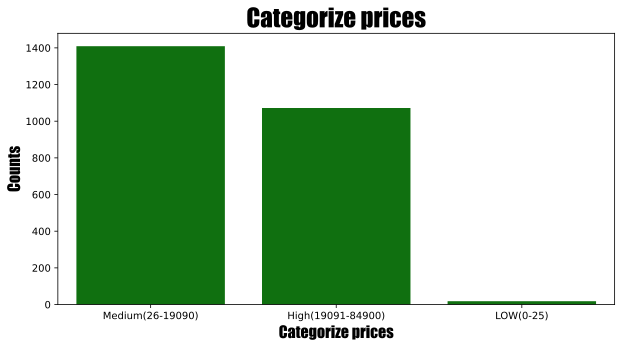

In [38]:
plt.figure(figsize = [10,5])
sns.countplot(data=df, x="price_cat", color='g')
plt.xlabel('Categorize prices', family='fantasy', fontsize = 16, color='k')
plt.ylabel('Counts', family='fantasy', fontsize = 16, weight = 'light',color= 'k') #'#FA8072'
plt.title('Categorize prices', family='fantasy',fontsize = 25 ,loc='center', color='k')
#plt.plot(df['price'], color= '#ff1a66') #'mediumvioletred')
plt.show();

### column 2: brand

In [39]:
## Inconsistent text and typos

brand_1 = list(df.brand.unique())
print('The number of brands of cars available for rent =', len(df.brand.unique()),'brands')
print('\n')
print('The most famous brands of cars for rent, which are as follows:','\n', brand_1)

The number of brands of cars available for rent = 180 brands


The most famous brands of cars for rent, which are as follows: 
 ['toyota-cruiser', 'ford-se', 'dodge-mpv', 'ford-door', 'chevrolet-1500', 'chevrolet-pk', 'gmc-door', 'chevrolet-malibu', 'ford-mpv', 'dodge-coupe', 'gmc-mpv', 'chrysler-wagon', 'kia-forte', 'buick-encore', 'chevrolet-door', 'kia-sorento', 'buick-door', 'ford-doors', 'ford-chassis', 'infiniti-q70', 'chevrolet-camaro', 'ford-convertible', 'mercedes-benz-vans', 'ford-pk', 'ford-srw', 'jeep-compass', 'buick-enclave', 'chrysler-300', 'jeep-cherokee', 'chrysler-pacifica', 'bmw-x3', 'chevrolet-equinox', 'chrysler-door', 'bmw-door', 'dodge-challenger', 'bmw-m', 'chevrolet-colorado', 'ford-focus', 'cadillac-door', 'dodge-durango', 'ford-escape', 'dodge-charger', 'ford-explorer', 'ford-f-150', 'chevrolet-3500', 'dodge-caravan', 'chrysler-van', 'dodge-dart', 'dodge-van', 'chevrolet-2500', 'dodge-doors', 'dodge-door', 'cadillac-esv', 'ford-cutaway', 'chrysler-doors', 'fo

In [40]:
df.brand.value_counts()

ford-door           363
ford-f-150          219
dodge-caravan       102
chevrolet-door       99
ford-doors           97
                   ... 
kia-sportage          1
audi-q5               1
lexus-gx              1
lincoln-nautilus      1
nissan-nvp            1
Name: brand, Length: 180, dtype: int64

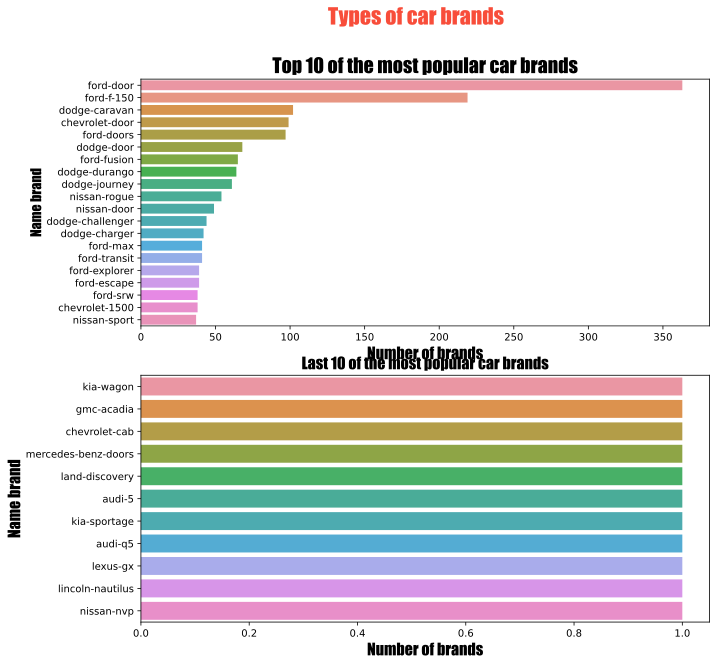

In [45]:
brandx = df['brand'].value_counts().head(20).index
brand_last_10 =df.brand.value_counts().iloc[-11:].index

#create multiple plots
plt.figure(figsize=[10.2,10])
plt.suptitle('Types of car brands',family='fantasy',fontsize = 22 ,color='#f84d3a')
plt.subplot(2,1,1)

sns.countplot(data=df, y='brand', order=brandx)
plt.title('Top 10 of the most popular car brands', family='fantasy',fontsize = 20,loc='center',color='k')
plt.xlabel('Number of brands', family='fantasy', fontsize = 16, weight = 'light',color= 'k')
plt.ylabel('Name brand', family='fantasy', fontsize = 14, weight = 'light',color= 'k');
print('\n')
print('\n')
plt.subplot(2,1,2)
sns.countplot(data=df, y='brand', order=brand_last_10)
plt.title('Last 10 of the most popular car brands', family='fantasy',fontsize = 16 ,loc='center',color='k')
plt.xlabel('Number of brands',family='fantasy', fontsize = 16, weight = 'light',color= 'k')
plt.ylabel('Name brand', family='fantasy', fontsize = 16, weight = 'light',color= 'k');

### column 3: Year 

In [46]:
year_value= df.year.value_counts() #.sort_values()
print('Number of cars by year of production (issue):','\n', year_value) 
print('\n')
year_uniqu= df.year.unique()
print('Number of cars by year of production (issue):','\n', len(year_uniqu), '\n', year_uniqu )

Number of cars by year of production (issue): 
 2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: year, dtype: int64


Number of cars by year of production (issue): 
 30 
 [2008 2011 2018 2014 2010 2017 2009 2013 2015 2020 2016 1973 2003 2019
 2002 2000 2001 2005 2012 2006 2007 1998 2004 1994 1997 1996 1999 1984
 1995 1993]


In [47]:
## Inconsistent text and typos
year_con = df.year.agg(['max', 'mean','min'])
year_con

max     2020.000000
mean    2016.714286
min     1973.000000
Name: year, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


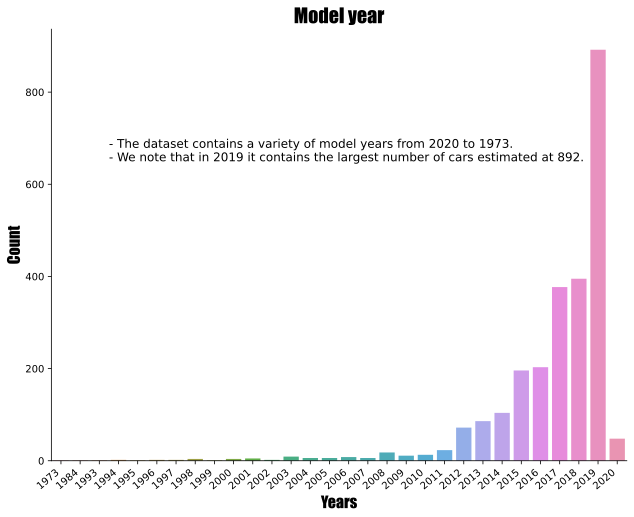

In [49]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.spines[['right', 'top', 'right']].set_visible(False)

sns.countplot(x='year', data=df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
ax.text(2.5, 650, '- The dataset contains a variety of model years from 2020 to 1973.''\n''- We note that in 2019 it contains the largest number of cars estimated at 892.',
          fontsize=12, color='black')#, fontweight='bold')
plt.title('Model year', family='fantasy',fontsize = 20 ,loc='center',color='k')
plt.xlabel('Years',family='fantasy', fontsize = 16, weight = 'light',color= 'k')
plt.ylabel('Count', family='fantasy', fontsize = 16, weight = 'light',color= 'k')
plt.show();


### column : state 

In [50]:
state_1 = df.state.unique()
print('Total number of states =', len(df.state.unique()),', which are as follows:')
print('\n')
print(state_1)

Total number of states = 44 , which are as follows:


['new jersey usa' 'tennessee usa' 'georgia usa' 'virginia usa'
 'florida usa' 'texas usa' 'california usa' 'north carolina usa'
 'ohio usa' 'new york usa' 'pennsylvania usa' 'south carolina usa'
 'michigan usa' 'washington usa' 'arizona usa' 'utah usa' 'kentucky usa'
 'massachusetts usa' 'nebraska usa' 'ontario canada' 'missouri usa'
 'minnesota usa' 'oklahoma usa' 'connecticut usa' 'indiana usa'
 'arkansas usa' 'kansas usa' 'wyoming usa' 'colorado usa' 'illinois usa'
 'wisconsin usa' 'mississippi usa' 'maryland usa' 'oregon usa'
 'west virginia usa' 'nevada usa' 'rhode island usa' 'louisiana usa'
 'alabama usa' 'new mexico usa' 'idaho usa' 'new hampshire usa'
 'montana usa' 'vermont usa']


In [51]:
df.state.value_counts()

pennsylvania usa      299
florida usa           246
texas usa             214
california usa        190
michigan usa          169
north carolina usa    146
minnesota usa         119
illinois usa          113
wisconsin usa          94
virginia usa           90
new jersey usa         87
nevada usa             85
oklahoma usa           71
south carolina usa     64
new york usa           58
georgia usa            51
missouri usa           46
arizona usa            33
ohio usa               31
massachusetts usa      27
oregon usa             27
tennessee usa          26
connecticut usa        25
mississippi usa        24
colorado usa           21
west virginia usa      21
alabama usa            17
washington usa         14
indiana usa            14
arkansas usa           12
louisiana usa          11
utah usa               10
kentucky usa            9
ontario canada          7
kansas usa              4
maryland usa            4
nebraska usa            4
new mexico usa          4
new hampshir

In [52]:
df.state.value_counts(normalize= True)

pennsylvania usa      0.119648
florida usa           0.098439
texas usa             0.085634
california usa        0.076030
michigan usa          0.067627
north carolina usa    0.058423
minnesota usa         0.047619
illinois usa          0.045218
wisconsin usa         0.037615
virginia usa          0.036014
new jersey usa        0.034814
nevada usa            0.034014
oklahoma usa          0.028411
south carolina usa    0.025610
new york usa          0.023209
georgia usa           0.020408
missouri usa          0.018407
arizona usa           0.013205
ohio usa              0.012405
massachusetts usa     0.010804
oregon usa            0.010804
tennessee usa         0.010404
connecticut usa       0.010004
mississippi usa       0.009604
colorado usa          0.008403
west virginia usa     0.008403
alabama usa           0.006803
washington usa        0.005602
indiana usa           0.005602
arkansas usa          0.004802
louisiana usa         0.004402
utah usa              0.004002
kentucky

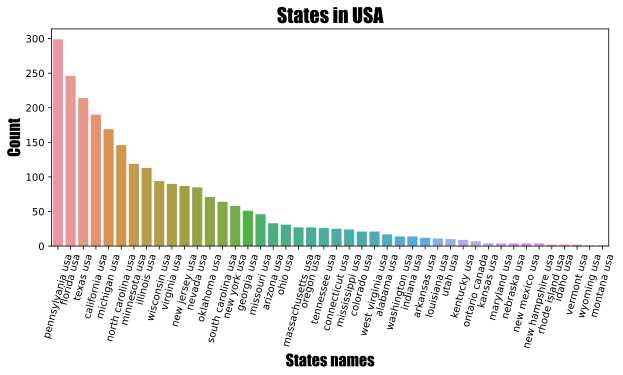

In [53]:
plt.figure(figsize = [10,4])
#df.states.value_counts().plot.bar( color='b') #.plot(kind='bar', color='b');
highest_sport = df['state'].value_counts().index
sns.countplot(data=df, x='state', order=highest_sport)
plt.xticks(rotation=75, fontsize = '10' )
plt.xlabel('States names', family='fantasy', fontsize = 16, color= 'black') #'#931406'
plt.ylabel('Count', family='fantasy', fontsize = 16, weight = 'light',color= 'black') #'#FA8072'
plt.title('States in USA', family='fantasy',fontsize = 20 ,loc='center',color='black');

### column : color

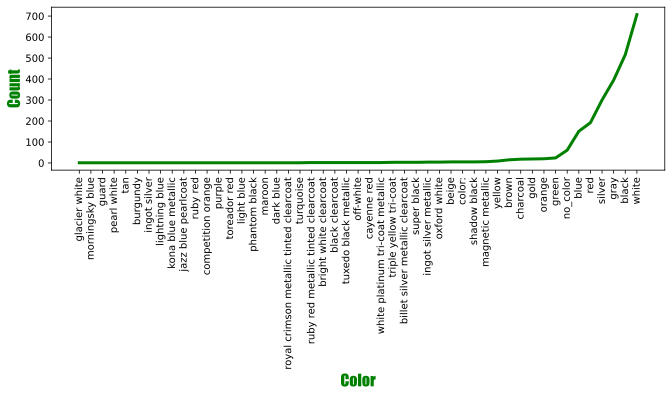

In [55]:
plt.figure(figsize =[11,3])
color_con= df.color.value_counts().sort_values()
plt.xticks(rotation=90)
plt.plot(color_con, linestyle = '-', linewidth = 3, c = 'g')
plt.xlabel('Color', family='fantasy', fontsize = 16, color='g')
plt.ylabel('Count', family='fantasy', fontsize = 16, weight = 'light',color= 'g'); #'#FA8072'


## Correlation Between Features

In [56]:
correlations = df.corr()
correlations

price      year   mileage
price    1.000000  0.329313 -0.352531
year     0.329313  1.000000 -0.594686
mileage -0.352531 -0.594686  1.000000

In [57]:
# We could also check each variable individually
correlations['price']

price      1.000000
year       0.329313
mileage   -0.352531
Name: price, dtype: float64

## َQuestions

### 1- Since white is the most common color in cars, we want to know what cities white colors are in, and how many white cars are in each brand?

In [58]:
#1 color_yellow 
#df[df.color == 'white']
#df.loc[df.color == 'white', ['color','brand','state','priceBinncd']]
#white_brand =df.loc[df.color == 'white', ['brand']].value_counts()
white_brand =df.loc[df.color == 'white', ['state', 'brand']].value_counts()
white_brand 
# or qww=df[df.color == 'white'].groupby(['state']).brand.value_counts()
#or 
#qazx1 = df[df.color == 'white']
#qazx1 = qazx1.groupby(['state','brand'])['color'].count().reset_index().sort_values('brand', ascending=False) #['brand'].count().reset_index().sort_values('brand', ascending=False)
#qazx1 

#qwe= df.groupby('color').get_group('white').groupby('state')['brand'].count().reset_index().sort_values('brand', ascending=False)
#qwe

state             brand            
texas usa         ford-door            39
pennsylvania usa  ford-f-150           20
michigan usa      ford-f-150           19
oklahoma usa      ford-f-150           10
texas usa         ford-mpv              9
                                       ..
missouri usa      ford-expedition       1
                  ford-f-750            1
                  ford-taurus           1
                  ford-transit          1
wisconsin usa     nissan-pathfinder     1
Length: 353, dtype: int64

### 2- What are the most common car colors in each state? 

In [59]:
# 4   The most common car colors in each state.
qaz= df.groupby(['state','color']).count().sort_values('state', ascending=False)
display(qaz) 

price  brand  year  title_status  mileage  condition  \
state         color                                                            
wyoming usa   maroon        1      1     1             1        1          1   
wisconsin usa white        27     27    27            27       27         27   
              silver        6      6     6             6        6          6   
              red          12     12    12            12       12         12   
              no_color      8      8     8             8        8          8   
...                       ...    ...   ...           ...      ...        ...   
alabama usa   no_color      1      1     1             1        1          1   
              blue          2      2     2             2        2          2   
              silver        3      3     3             3        3          3   
              white         3      3     3             3        3          3   
              black         5      5     5             5        5          5   

                        price_binncd  price_cat  
state         color                              
wyoming usa   maroon               1          1  
wisconsin usa white               27         27  
              silver               6          6  
              red                 12         12  
              no_color             8          8  
...                              ...        ...  
alabama usa   no_color             1          1  
              blue                 2          2  
              silver               3          3  
              white                3          3  
              black                5          5  

[342 rows x 8 columns]

In [75]:
plt.figure(figsize=(14,7))
dff = df[['state','color']]
fig = px.scatter(dff, x="state", y="color", color="color")
fig.show();

<Figure size 1008x504 with 0 Axes>

### We noticed that the number of white color in cars was the highest, but in the low price rate. 

In [61]:
df[df.color == 'white'].head(5)

price      brand  year   title_status  mileage  color           state  \
5    5700.0  dodge-mpv  2018  clean vehicle    45561  white       texas usa   
11  12920.0    gmc-mpv  2017  clean vehicle    39650  white  california usa   
15  12710.0   gmc-door  2017  clean vehicle    25747  white  california usa   
18   5210.0   ford-mpv  2017  clean vehicle    35714  white       texas usa   
20  12520.0   gmc-door  2017  clean vehicle    30114  white  california usa   

        condition price_binncd         price_cat  
5     2 days left          Low  Medium(26-19090)  
11  20 hours left          Low  Medium(26-19090)  
15  20 hours left          Low  Medium(26-19090)  
18    2 days left          Low  Medium(26-19090)  
20  20 hours left          Low  Medium(26-19090)

### 3- We want to know the effect of the price by color 

In [62]:
df.groupby('color')['price'].mean()

color
beige                                      13764.000000
billet silver metallic clearcoat           18490.666667
black                                      20507.763622
black clearcoat                            19652.500000
blue                                       17914.044277
bright white clearcoat                     23247.000000
brown                                      16477.200000
burgundy                                    2000.000000
cayenne red                                 9794.000000
charcoal                                   16822.222222
color:                                     11844.600000
competition orange                         30977.000000
dark blue                                     25.000000
glacier white                              11621.000000
gold                                       16375.544365
gray                                       17679.557035
green                                      18519.417867
guard                                     

In [63]:
df['average_color_price'] = df.groupby('color')['price'].transform('mean')
df['average_color_price'].head()

0    20507.763622
1    17753.465620
2    17753.465620
3    17914.044277
4    19260.012278
Name: average_color_price, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



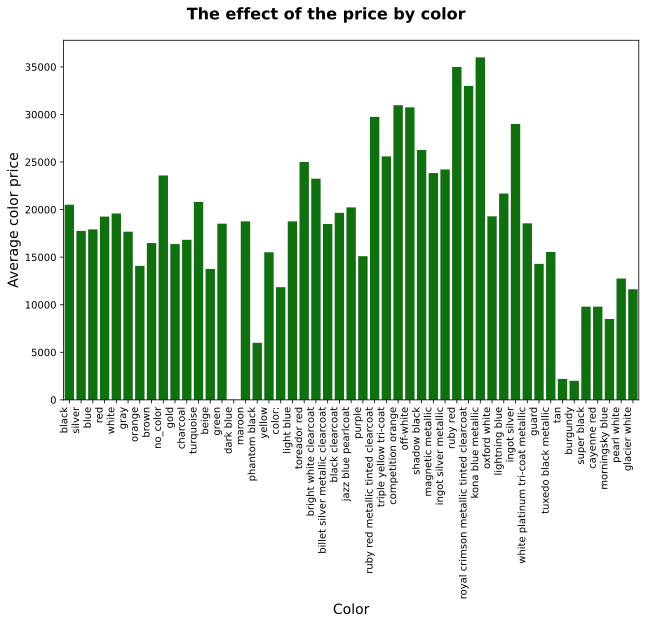

In [64]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df['color'], y=df['average_color_price'], color='green')
plt.tight_layout()
ax.set_xlabel('Color', color='black', fontsize=14)
ax.set_ylabel('Average color price', color='black', fontsize=14)
ax.text(10, 40000, 'The effect of the price by color ', color='black', fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()



### 4- What is the brand with the highest price and in which cities it is?

In [65]:
# The brand with the highest price and in which cities it is, The first step is to display prices from the highest to the lowest?
highest_price=(df.sort_values(by="price", ascending = False))
highest_price

price                   brand  year       title_status  mileage  \
502   84900.0  mercedes-benz-sl-class  2017      clean vehicle    25302   
1340  74000.0                ford-drw  2019      clean vehicle    10536   
1336  70000.0                ford-drw  2019      clean vehicle     9643   
277   67000.0        dodge-challenger  2019      clean vehicle    10944   
1215  65500.0                ford-srw  2019      clean vehicle     6500   
...       ...                     ...   ...                ...      ...   
386      25.0                gmc-door  2003  salvage insurance   138441   
383      25.0          chevrolet-door  2007  salvage insurance   194903   
362      25.0             ford-pickup  1994  salvage insurance   206162   
359      25.0          chevrolet-door  2008  salvage insurance   130623   
470      25.0                 ford-pk  2010  salvage insurance   155242   

         color           state      condition price_binncd          price_cat  \
502     silver     florida usa    2 days left         High  High(19091-84900)   
1340  no_color    illinois usa    2 days left         High  High(19091-84900)   
1336  no_color    illinois usa    2 days left         High  High(19091-84900)   
277       blue        ohio usa  21 hours left         High  High(19091-84900)   
1215     black     indiana usa  21 hours left         High  High(19091-84900)   
...        ...             ...            ...          ...                ...   
386      white    michigan usa    2 days left          Low          LOW(0-25)   
383       gray    virginia usa    2 days left          Low          LOW(0-25)   
362      white     georgia usa    2 days left          Low          LOW(0-25)   
359      white  california usa    8 days left          Low          LOW(0-25)   
470       gray    oklahoma usa  17 hours left          Low          LOW(0-25)   

      average_color_price  
502          17753.465620  
1340         23585.147541  
1336         23585.147541  
277          17914.044277  
1215         20507.763622  
...                   ...  
386          19594.334310  
383          17679.557035  
362          19594.334310  
359          19594.334310  
470          17679.557035  

[2499 rows x 11 columns]

In [66]:
# The second step is to determine the high prices only
df.loc[df.price_binncd == 'High', 
       ['price', 'brand', 'year', 'mileage','title_status',
        'price_binncd','state']].sort_values(by="price", ascending = False)#.value_counts( ascending = False)


price                   brand  year  mileage   title_status  \
502   84900.0  mercedes-benz-sl-class  2017    25302  clean vehicle   
1340  74000.0                ford-drw  2019    10536  clean vehicle   
1336  70000.0                ford-drw  2019     9643  clean vehicle   
277   67000.0        dodge-challenger  2019    10944  clean vehicle   
1215  65500.0                ford-srw  2019     6500  clean vehicle   
1331  65200.0                ford-max  2019    18138  clean vehicle   
667   63200.0      chevrolet-corvette  2016     4266  clean vehicle   
1334  63000.0                ford-srw  2019    11640  clean vehicle   
1343  63000.0                ford-srw  2018    17942  clean vehicle   
645   62000.0      chevrolet-corvette  2016    19403  clean vehicle   
399   61200.0              bmw-series  2020     7509  clean vehicle   
1341  60200.0                ford-srw  2019    31744  clean vehicle   
1342  60000.0                ford-srw  2018    18062  clean vehicle   
1896  59975.0              ford-f-150  2019       71  clean vehicle   
1901  59975.0              ford-f-150  2019      174  clean vehicle   
2088  59900.0                ford-max  2020     2162  clean vehicle   
414   58500.0                ford-srw  2019    21527  clean vehicle   
1368  58500.0         ford-expedition  2019     4970  clean vehicle   
1339  57700.0                ford-srw  2019    21101  clean vehicle   
1327  56700.0              ford-f-150  2019    13884  clean vehicle   

     price_binncd           state  
502          High     florida usa  
1340         High    illinois usa  
1336         High    illinois usa  
277          High        ohio usa  
1215         High     indiana usa  
1331         High    kentucky usa  
667          High  california usa  
1334         High    illinois usa  
1343         High    illinois usa  
645          High    illinois usa  
399          High  california usa  
1341         High    kentucky usa  
1342         High    illinois usa  
1896         High     florida usa  
1901         High     florida usa  
2088         High        ohio usa  
414          High  washington usa  
1368         High  california usa  
1339         High    kentucky usa  
1327         High    kentucky usa

In [67]:
dff = df[['price', 'brand','price_binncd','state']]
dff = dff[dff['price_binncd']== 'High']
fig = px.scatter(dff, x='state', y="price", color='brand',
                 size='price',hover_data=['price_binncd'])
fig.show()

### 5- Does the model year affect the price of the car? 

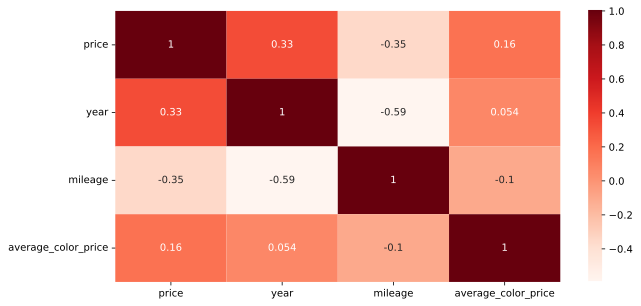

In [68]:
plt.figure(figsize=(10,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [69]:
year_count = df['year'].value_counts().to_frame().reset_index()
year_count.rename(columns={'index':'year', 'year':'count'}, inplace=True)
year_count['percentages'] = year_count['count']/sum(year_count['count'])*100

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



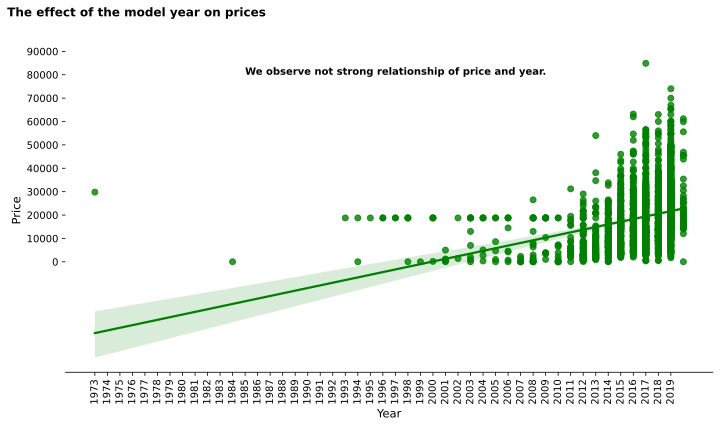

In [70]:
fig = plt.figure(figsize=(9, 4.5))

axes = fig.add_axes ([0,0,1,1])  #([0.15, 0.1, 0.7, 0.3])

sns.regplot(x=df['year'], y=df['price'], color='green')

axes.spines[['right', 'top', 'left']].set_visible(False)

plt.xticks(range(year_count['year'].min(), year_count['year'].max()), rotation=90)
plt.yticks(range(0,100000, 10000))

axes.set_xlabel('Year', color='black', fontsize=11.5)
axes.set_ylabel('Price', color='black', fontsize=11.5)

axes.text(1985, 80000, 'We observe not strong relationship of price and year.', fontsize=10, color='black', fontweight='bold')
axes.text(1966, 105000, 'The effect of the model year on prices', color='black', fontsize=12, fontweight='bold')

fig.show();


### 6- What states have clean cars, and what are the most popular brands in each state? 

In [71]:
#df.groupby('state')['title_status'].mean()#.sort.valus().state.index()
plt.figure(figsize=(10,7))
dff = df[['brand','title_status','state','price']]
fig = px.scatter(dff, x="state", y="brand", color="title_status")
fig.show()

<Figure size 720x504 with 0 Axes>

In [72]:
(df.groupby(['state','brand']).mean().reset_index().sort_values(['price','year'], ascending=[True,False]))

state                   brand    price    year   mileage  \
261  kentucky usa        chevrolet-vehicl     25.0  2020.0    7232.0   
92   colorado usa        chevrolet-pickup     25.0  2010.0  149189.0   
534  oklahoma usa                 ford-pk     25.0  2010.0  155242.0   
650     texas usa               audi-door     25.0  2008.0  177422.0   
705  virginia usa          chevrolet-door     25.0  2007.0  194903.0   
..            ...                     ...      ...     ...       ...   
264  kentucky usa                ford-max  65200.0  2019.0   18138.0   
253   indiana usa                ford-srw  65500.0  2019.0    6500.0   
499      ohio usa        dodge-challenger  67000.0  2019.0   10944.0   
226  illinois usa                ford-drw  72000.0  2019.0   10089.5   
174   florida usa  mercedes-benz-sl-class  84900.0  2017.0   25302.0   

     average_color_price  
261         20507.763622  
92          19594.334310  
534         17679.557035  
650         20507.763622  
705         17679.557035  
..                   ...  
264         19594.334310  
253         20507.763622  
499         17914.044277  
226         23585.147541  
174         17753.465620  

[798 rows x 6 columns]